In [24]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd 
import matplotlib.pyplot as plt

In [38]:
finviz_url = "https://finviz.com/quote.ashx?t="
tickers = ["AMZN","META","GOOG"]

news_tables = {}
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
for ticker in tickers:
    url = finviz_url + ticker
    print(url)
    req = Request(url=url, headers=headers)
    response = urlopen(req)

    html = BeautifulSoup(response,"html")
    news_table = html.find(id="news-table")
    news_tables[ticker] = news_table


https://finviz.com/quote.ashx?t=AMZN
https://finviz.com/quote.ashx?t=META
https://finviz.com/quote.ashx?t=GOOG


In [39]:
parsed_data=[]

for ticker, news_table in news_tables.items():

    for row in news_table.findAll("tr"):

        if row.a:
            title = row.a.text
        else:
            title = "N/A"
        date_data = row.td.text.split(' ')

        if(len(date_data)>10):
            if len(date_data) ==21:
                time = date_data[12]
            else:
                date = date_data[12]
                time = date_data[13]
        elif(len(date_data) == 1):
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker,date,time,title])

print(parsed_data)

[['AMZN', 'Jul-30-23', '01:15PM\r\n', 'Week Ahead: UK rates set to hit 15-year high'], ['AMZN', 'Jul-30-23', '10:43AM\r\n', 'Apple, Amazon earnings, July jobs report: What to know this week'], ['AMZN', 'Jul-30-23', '10:00AM\r\n', 'Got $1,000? Buy These Hot Growth Stocks Before They Take Off'], ['AMZN', 'Jul-30-23', '08:00AM\r\n', 'Bull Market Is Coming: 3 Growth Stocks to Buy Now'], ['AMZN', 'Jul-30-23', '07:09AM\r\n', '20 Least Educated States in America'], ['AMZN', 'Jul-30-23', '07:00AM', 'N/A'], ['AMZN', 'Jul-30-23', '07:00AM\r\n', 'Apple, Amazon, Starbucks to Report in Packed Earnings Week'], ['AMZN', 'Jul-30-23', '05:30AM\r\n', "2 Monster Stocks You Won't Want to Ignore"], ['AMZN', 'Jul-30-23', '05:21AM\r\n', "1 Supercharged Growth Stock That's a Shoo-in to Rejoin Apple, Microsoft, Alphabet, Amazon, and Nvidia in the $1 Trillion Club"], ['AMZN', 'Jul-29-23', '05:31PM\r\n', '12 Best Small Cap Tech Stocks To Buy'], ['AMZN', 'Jul-29-23', '01:00PM\r\n', 'Amazon and Microsoft claim inv

In [45]:
df = pd.DataFrame(parsed_data, columns=["ticker","date","time","title"])
df

,ticker,date,time,title
0,AMZN,Jul-30-23,01:15PM\r\n,Week Ahead: UK rates set to hit 15-year high
1,AMZN,Jul-30-23,10:43AM\r\n,"Apple, Amazon earnings, July jobs report: What..."
2,AMZN,Jul-30-23,10:00AM\r\n,"Got $1,000? Buy These Hot Growth Stocks Before..."
3,AMZN,Jul-30-23,08:00AM\r\n,Bull Market Is Coming: 3 Growth Stocks to Buy Now
4,AMZN,Jul-30-23,07:09AM\r\n,20 Least Educated States in America
...,...,...,...,...
304,GOOG,Jul-26-23,11:48AM\r\n,"Union Pacific, Boeing rise; Snap, Microsoft fa..."
305,GOOG,Jul-26-23,11:41AM\r\n,Nvidias Earnings Could Surge. Just Listen to M...
306,GOOG,Jul-26-23,11:39AM\r\n,Alphabet stock rallies after second quarter re...
307,GOOG,Jul-26-23,10:59AM\r\n,Our Take on Microsoft's Earnings


In [41]:
vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)["compound"]
df["compound"] = df["title"].apply(f)


In [42]:
df["date"] = pd.to_datetime(df.date).dt.date

<Figure size 720x576 with 0 Axes>

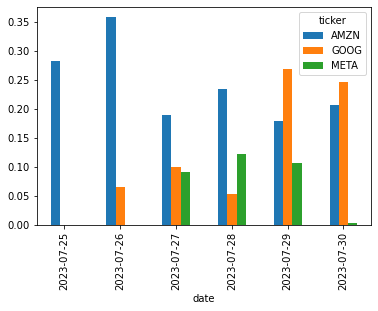

In [43]:
plt.figure(figsize=(10,8))

mean_df = df.groupby(["ticker","date"]).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs("compound", axis="columns").transpose()
mean_df.plot(kind="bar")

plt.show()